In [223]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#기본세팅

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [225]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [226]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [227]:
# 음수부호 표시하도록 설정
plt.rc("axes", unicode_minus = False)

# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '테스트')

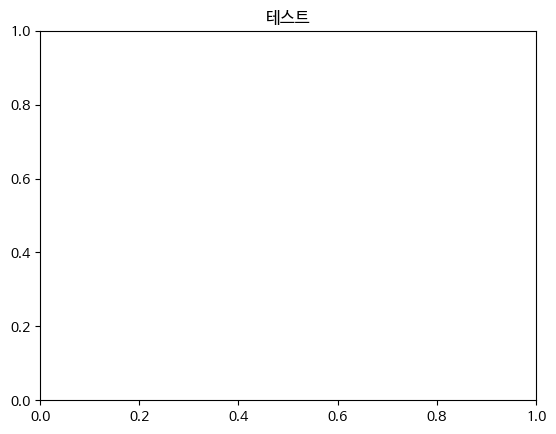

In [228]:
# 한글 출력 잘되는지 테스트
plt.title('테스트')

#데이터 준비

In [229]:
df = pd.read_csv('/content/drive/MyDrive/24-1/데모마/팀플/데이터/SeoulBikeData.csv', encoding ='cp949')
dust =pd.read_csv('/content/drive/MyDrive/24-1/데모마/팀플/데이터/2017_to_2018_Dust.csv', encoding='cp949')

In [230]:
df.head()


,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [231]:
dust.head()

,측정일시,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20171201,0.036872,0.011615,0.533333,0.005026,27.205128,12.974359
1,20171202,0.045718,0.005333,0.743590,0.005308,43.333333,24.153846
2,20171203,0.042231,0.004385,0.741026,0.004919,53.820513,35.128205
3,20171204,0.025051,0.016282,0.535897,0.004684,44.974359,25.871795
4,20171205,0.025615,0.015821,0.415385,0.004872,23.589744,10.871795


In [232]:
# 날짜 데이터 분리를 위하여 datetime 형식으로 바꾸어 주었다.
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [233]:
# 연/월/일 분리해주기
import datetime as dt
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [234]:
# 컬럼명 정리
df.rename(columns={'Temperature(캜)' : 'Temperature', # 온도
                   'Dew point temperature(캜)' : 'Dew_point_temperature', # 이슬점 온도
                   'Humidity(%)' : 'Humidity', # 습도
                   'Solar Radiation (MJ/m2)' : 'Solar_radiation', # 자외선량
                   'Rainfall(mm)' : 'Rainfall', # 강수량
                   'Snowfall (cm)' : 'Snowfall', # 강설량
                   'Wind speed (m/s)' : 'Wind_speed', # 풍속
                   'Visibility (10m)' : 'Visibility', # 가시거리
                   'Functioning Day' : 'Functioning_day', # 평일유무
                   'Rented Bike Count' : 'Rented_bike_count'}, inplace=True) # 대여량

In [235]:
import datetime

time = pd.Series(dust['측정일시'])

dust['측정일시'] = pd.to_datetime(time, format='%Y%m%d')


In [236]:
dust.rename(columns={'측정일시' : 'Date'}, inplace=True)

In [237]:
df['Date']

0      2017-12-01
1      2017-12-01
2      2017-12-01
3      2017-12-01
4      2017-12-01
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [238]:
dust['Date']

0     2017-12-01
1     2017-12-02
2     2017-12-03
3     2017-12-04
4     2017-12-05
         ...    
360   2018-11-26
361   2018-11-27
362   2018-11-28
363   2018-11-29
364   2018-11-30
Name: Date, Length: 365, dtype: datetime64[ns]

In [239]:
# 미세먼지 관련 데이터를 df에 merge해주었다.
df=df.merge(dust, how='outer')

In [240]:
df.dtypes

Date                     datetime64[ns]
Rented_bike_count                 int64
Hour                              int64
Temperature                     float64
Humidity                          int64
Wind_speed                      float64
Visibility                        int64
Dew_point_temperature           float64
Solar_radiation                 float64
Rainfall                        float64
Snowfall                        float64
Seasons                          object
Holiday                          object
Functioning_day                  object
Year                              int32
Month                             int32
Day                               int32
이산화질소농도(ppm)                    float64
오존농도(ppm)                       float64
일산화탄소농도(ppm)                    float64
아황산가스(ppm)                      float64
미세먼지(㎍/㎥)                       float64
초미세먼지(㎍/㎥)                      float64
dtype: object

In [241]:
df.head()

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,...,Functioning_day,Year,Month,Day,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Yes,2017,12,1,0.036872,0.011615,0.533333,0.005026,27.205128,12.974359
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Yes,2017,12,1,0.036872,0.011615,0.533333,0.005026,27.205128,12.974359
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Yes,2017,12,1,0.036872,0.011615,0.533333,0.005026,27.205128,12.974359
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Yes,2017,12,1,0.036872,0.011615,0.533333,0.005026,27.205128,12.974359
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Yes,2017,12,1,0.036872,0.011615,0.533333,0.005026,27.205128,12.974359


In [242]:
int_cols = df.select_dtypes(include=['int', 'float'])

<Axes: >

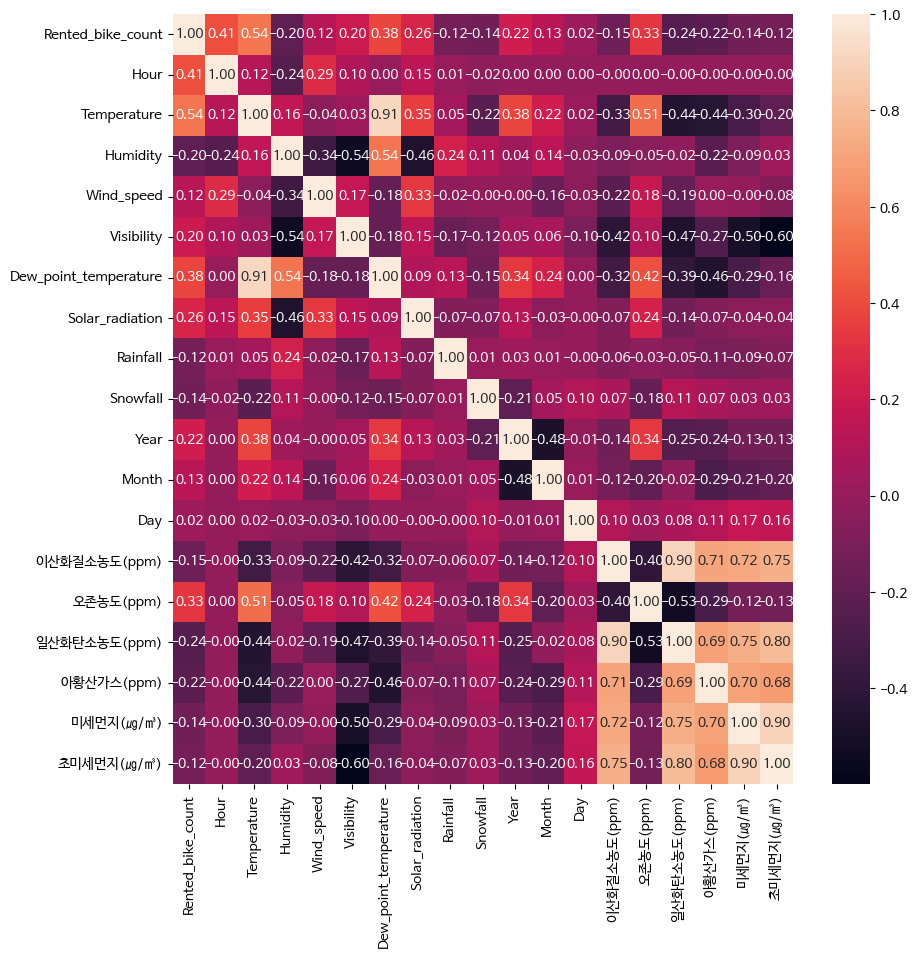

In [243]:
# 연속형 데이터들의 상관관계 분석

corr= int_cols.corr()


plt.figure(figsize=(10,10))
sns.heatmap(corr,
            annot= True,
            fmt='.2f')



In [244]:
# dew_point_temperature 와 temperature의 상관계수 값이 0.91임으로 다중공선성 문제 발생 가능
# dew_point_temperature 독립변수에서 제외하였다.
df.drop('Dew_point_temperature', axis=1, inplace=True)


In [245]:
df.columns

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Solar_radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_day', 'Year', 'Month', 'Day',
       '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)',
       '초미세먼지(㎍/㎥)'],
      dtype='object')

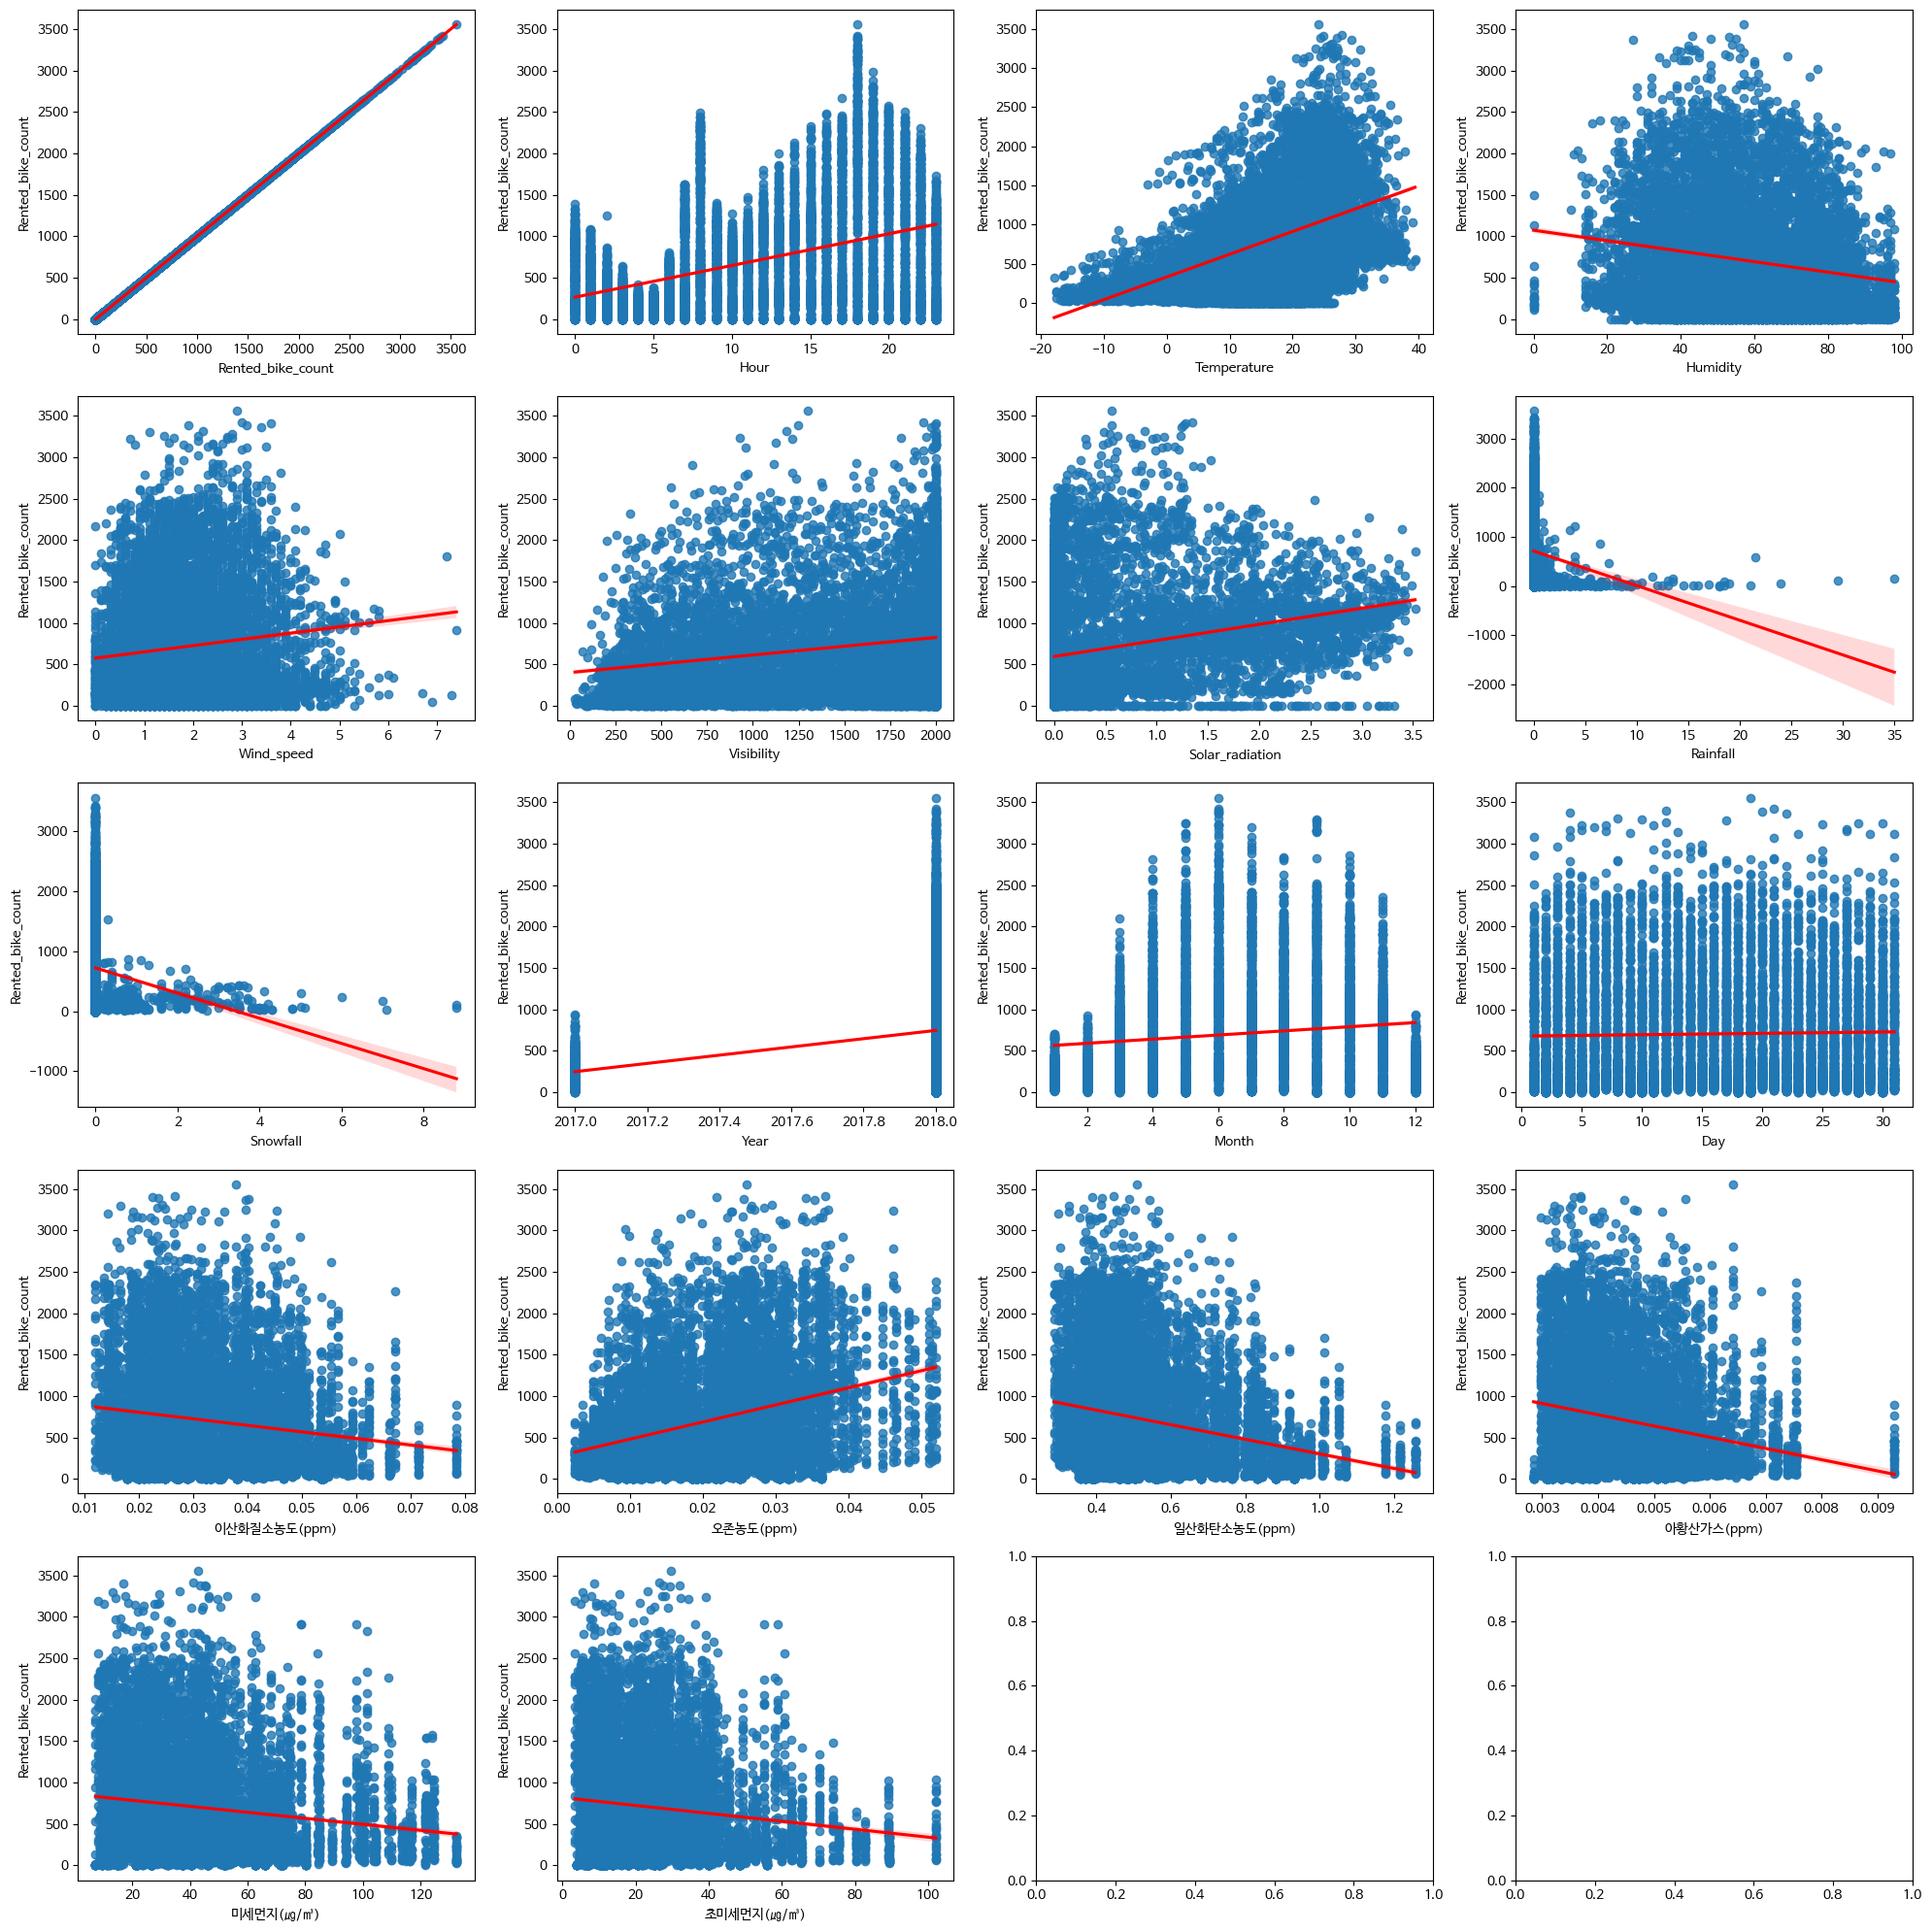

In [246]:
# 선형관계를 파악하기 위해 연속형 변수들과, 자전거 이용객 간의 regplot을 그려 상관성을 파악하였다.
int_float_col = df.select_dtypes(include=['int', 'float'])
int_float_cols = int_float_col.columns

fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i, col in enumerate(int_float_cols):
    sns.regplot(x=df[col], y=df['Rented_bike_count'], ax=ax[i//4, i%4], line_kws={'color': 'red'})
    ax[i//4, i%4].set_xlabel(col)
    ax[i//4, i%4].set_ylabel('Rented_bike_count')

plt.tight_layout()
plt.show()

In [247]:
df.select_dtypes(include='object')

,Seasons,Holiday,Functioning_day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


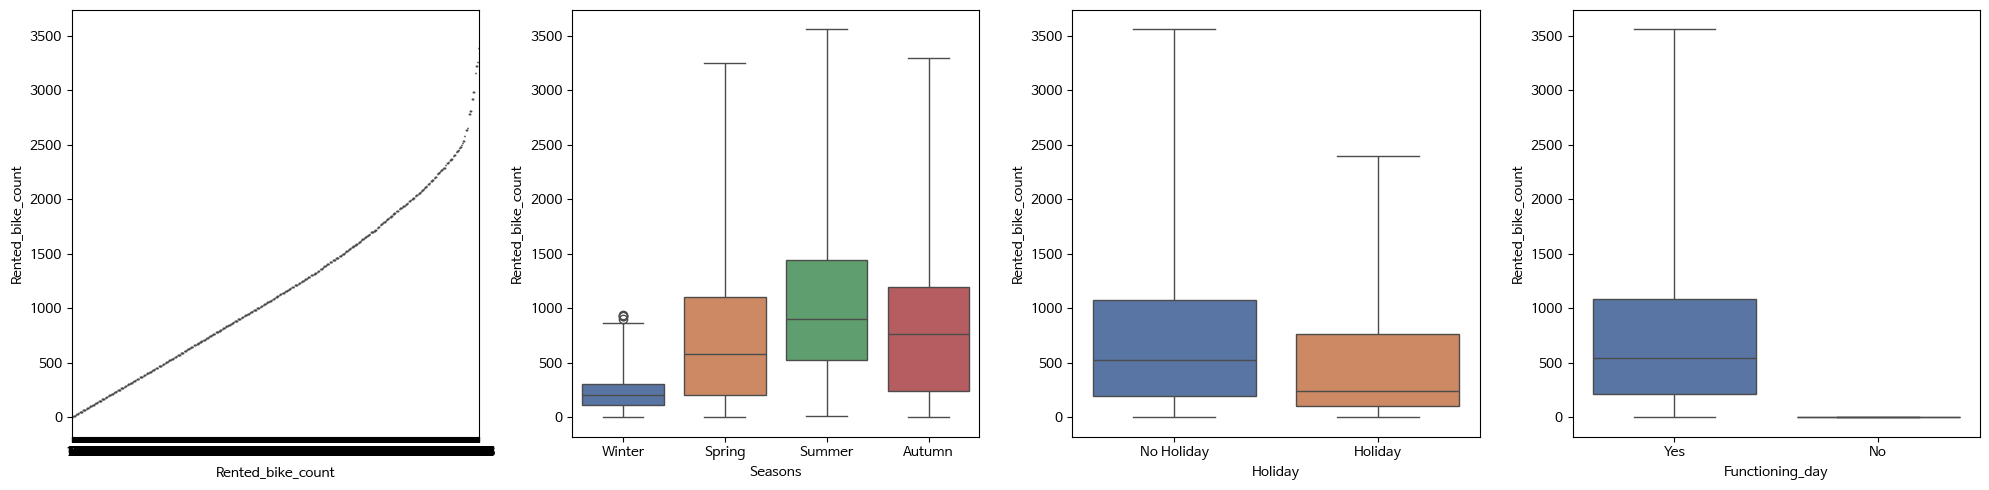

In [248]:
# 명목형 변수들은 총 3개로, 이 또한, 자전거 탑승인원과 상관성을 파악하기 위해 boxplot을 그렸다.
object_col = df[['Rented_bike_count', 'Seasons', 'Holiday', 'Functioning_day']]
object_cols = object_col.columns

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(object_cols):
    sns.boxplot(x=df[col], y=df['Rented_bike_count'], ax=ax[i],
                palette='deep', whis=3.0)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Rented_bike_count')

plt.tight_layout()
plt.show()

# 피처엔지니어링

<Axes: title={'center': '파생 변수들의 상관계수값'}>

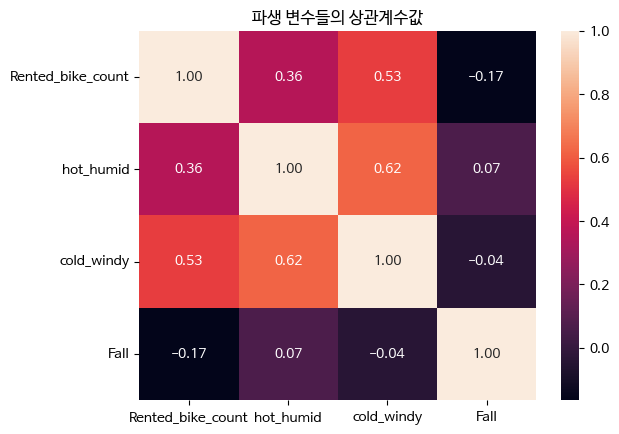

In [249]:
# 변수 사이의 관련성을 고려하여 새로운 파생변수들을 만들어 보았다.

# 덥고 습한 날씨엔 사람들이 타지 않을것이다
df['hot_humid'] = df['Temperature'] * df['Humidity']

# 춥고 바람부는날엔 사람들이 타지 않을 것이다.
df['cold_windy'] = df['Temperature'] * df['Wind_speed']

# 눈오는날 + 비오는날 합쳐서 Fall이라는 변수를 추가했다.
df['Fall'] = df['Rainfall'] + df['Snowfall']

corr =df[['Rented_bike_count', 'hot_humid', 'cold_windy', 'Fall']].corr()

plt.title('파생 변수들의 상관계수값')
sns.heatmap(corr,annot=True, fmt='.2f')

# 범주형 변수들 인코딩하기

In [250]:
df.drop('Date',axis=1,inplace=True)

In [251]:
df2=pd.get_dummies(df) # 모델링에 사용할 데이터를 df2에 저장

In [252]:
df2.shape

(8760, 29)

# 모델링하기

In [253]:
# test_X는 2018년 6월의 변수 28개를 지정하였다.
# 2018_6월의 이용객들의 수를  test_y로 설정하였다.

test_x = df2.loc[(df2['Year'] == 2018) & (df2['Month'] == 6)]

test_y = test_x['Rented_bike_count'] # 이용객의 수
test_X = test_x.drop('Rented_bike_count',axis=1)

In [254]:
train_X = df2.drop(test_x.index) # 테스트세트 제외

train_y = train_X['Rented_bike_count'] # 전체 자전거 대여 수
train_X.drop('Rented_bike_count', axis=1, inplace=True)



In [255]:
print(train_X.shape)
print(test_X.shape)

print(train_y.shape)
print(test_y.shape)

(8040, 28)
(720, 28)
(8040,)
(720,)


In [256]:
from sklearn.model_selection import train_test_split

# 훈련 데이터를 훈련 세트와 검증 세트로 분할하였다.
train_input, val_input, train_target, val_target = train_test_split(train_X, train_y,random_state=42)

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


##선형회귀

In [258]:
lr= LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(val_input, val_target))



0.5824577568113778
0.5627853003057872


## 랜덤포레스트

In [259]:
# RandomForest를 통한 점수

rf = RandomForestRegressor()
rf.fit(train_input, train_target)

print('train_score:', rf.score(train_input,train_target))
print('valid_score:', rf.score(val_input,val_target))

mse = mean_squared_error(val_target, rf.predict(val_input))
print('rmse :' ,np.sqrt(mse))

train_score: 0.9842368186651352
valid_score: 0.8913066074239415
rmse : 198.8128203617639


## LGBM 회귀

In [260]:
# LGBM회귀
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

lgbm.fit(train_input, train_target)
print('train_score:', lgbm.score(train_input,train_target))
print('valid_score:', lgbm.score(val_input,val_target))

mse = mean_squared_error(val_target, lgbm.predict(val_input))
print('rmse :' ,np.sqrt(mse))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3015
[LightGBM] [Info] Number of data points in the train set: 6030, number of used features: 28
[LightGBM] [Info] Start training from score 659.618408
train_score: 0.9604462090815236
valid_score: 0.9112560576288294
rmse : 179.64377517178036


##Xboost 회귀



In [262]:
from xgboost import XGBRegressor
xgb= XGBRegressor()

xgb.fit(train_input, train_target)
print('train_score:', xgb.score(train_input,train_target))
print('valid_score:', xgb.score(val_input,val_target))

mse = mean_squared_error(val_target, xgb.predict(val_input))
print('rmse :' ,np.sqrt(mse))

train_score: 0.9889372960834165
valid_score: 0.9135817258218139
rmse : 177.27423037249878


<훈련세트와 검증세트를 활용했을 때 모델별 점수 비교>

*   RandomForest
  - train_score:   0.9845021638338612
  - valid_score: 0.9845021638338612
  - rmse : 199.6163827347831

*   LGBMRegressor
  - train_score: 0.9601493575814987
  - valid_score: 0.909775707123082
  - rmse : 181.13591014342362

* XboostRegressor
  - train_score: 0.9865210877968267
  - valid_score: 0.9095146605592039
  - rmse :181.39776176001604



**-> 오차값(RMSE)이 가장 작은 LGBMRegressor로 모델 결정 **

In [263]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

param_dist = {
    'num_leaves': sp_randint(6, 50), ## 각 트리의 최대 리프 노드 개수 (6에서 49까지의 무작위 정수 선택)
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # 학습률 (사용할 수 있는 고정된 값들)
    'n_estimators': sp_randint(50, 500), # 부스팅 트리의 개수 (50에서 499까지의 무작위 정수 선택)
    'max_depth': sp_randint(3, 15),  # 각 트리의 최대 깊이 (3에서 14까지의 무작위 정수 선택)
    'min_child_samples': sp_randint(2, 50), # 리프 노드에 필요한 최소 샘플 수 (2에서 49까지의 무작위 정수 선택)
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], #  # 각 트리를 학습시킬 때 사용할 데이터 샘플링 비율
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], #  각 트리를 학습시킬 때 사용할 피처 샘플링 비율
    'reg_alpha': [0, 0.1, 0.5, 1.0], # L1 정규화 항의 계수
    'reg_lambda': [0, 0.1, 0.5, 1.0] # L2 정규화 항의 계수
}



# 랜덤 서치 수행 (소요시간 5분)
random_search_lgbm = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist, n_iter=200, cv=5)
random_search_lgbm.fit(train_X,train_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=200,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad4a63241c0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad4b06ba1a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad4b06bae90>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ad4ae3fffa0>,
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [264]:
# LGBMRegressor와 Random Search를 통해 찾아낸 최적 파라미터
random_search_lgbm.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 11,
 'min_child_samples': 23,
 'n_estimators': 356,
 'num_leaves': 28,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.6}

In [265]:
print('train score :',random_search_lgbm.score(train_X, train_y))
print('test score :',random_search_lgbm.score(test_X, test_y))
mse = mean_squared_error(test_y, random_search_lgbm.predict(test_X))
print('rmse :' ,np.sqrt(mse))

train score : 0.9650238736500509
test score : 0.7812539214886749
rmse : 359.4371190479755


- 78% R2 score
- RMSE : 359

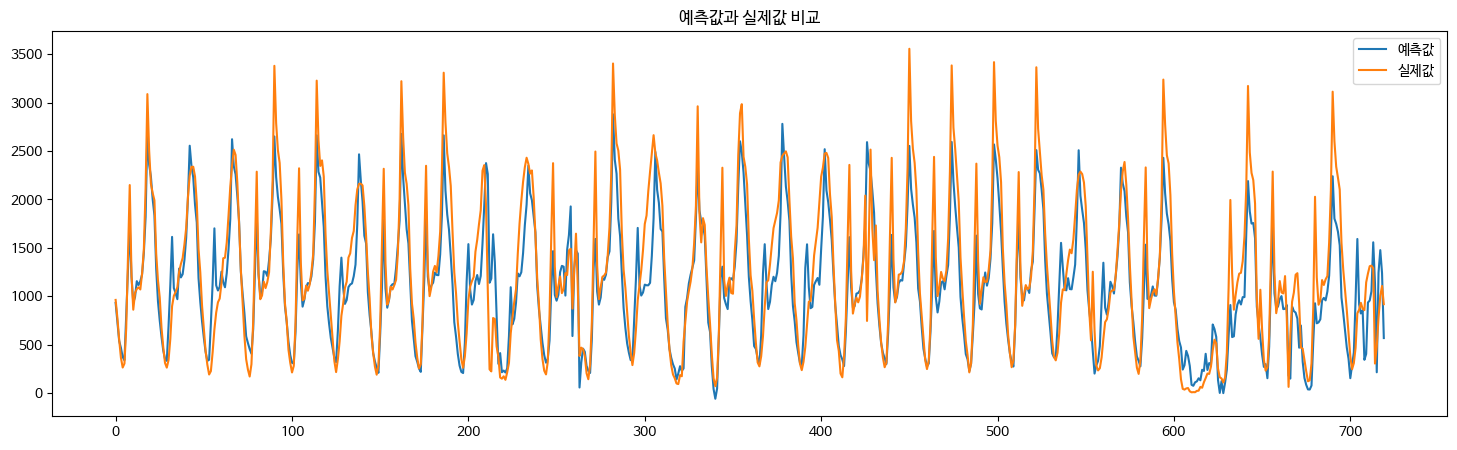

In [266]:
a= pd.DataFrame([random_search_lgbm.predict(test_X), test_y]).T

plt.figure(figsize=(18,5))
plt.title('예측값과 실제값 비교')
plt.plot(a[0],label='예측값')
plt.plot(a[1], label='실제값')
plt.legend()